In [11]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
%pprint
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Pretty printing has been turned ON


In [2]:
goog = pd.read_csv("./data/GOOG.csv", index_col=0, parse_dates=["Date"])
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [9]:
goog.columns
goog.index
goog.describe()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20'],
              dtype='datetime64[ns]', name='Date', length=3253, freq=None)

,Open,High,Low,Close,Adj Close,Volume
count,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3.253000e+03
mean,370.588678,373.854568,366.959060,370.463274,370.463274,8.139070e+06
std,212.537536,213.645163,211.213609,212.542226,212.542226,8.403870e+06
min,49.409801,50.680038,47.800831,49.818268,49.818268,7.900000e+03
25%,225.928162,228.050217,222.984207,224.986694,224.986694,2.743600e+06
50%,292.030396,293.898407,288.538483,291.318054,291.318054,5.374600e+06
75%,531.599976,535.729126,527.810913,532.299988,532.299988,1.081150e+07
max,984.500000,988.250000,977.200012,983.679993,983.679993,8.254150e+07


In [10]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3253 entries, 2004-08-19 to 2017-07-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3253 non-null   float64
 1   High       3253 non-null   float64
 2   Low        3253 non-null   float64
 3   Close      3253 non-null   float64
 4   Adj Close  3253 non-null   float64
 5   Volume     3253 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 177.9 KB


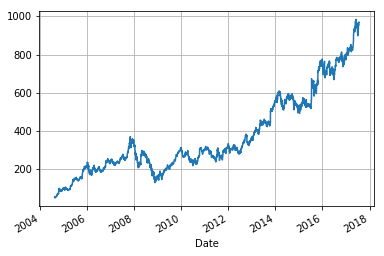

In [14]:
goog["Adj Close"].plot(grid = True)

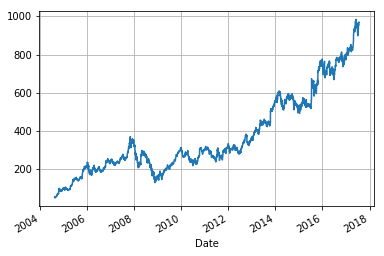

In [15]:
goog["Close"].plot(grid = True)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.423252,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.401170,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.371726,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.380927,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.391969,18362400.0


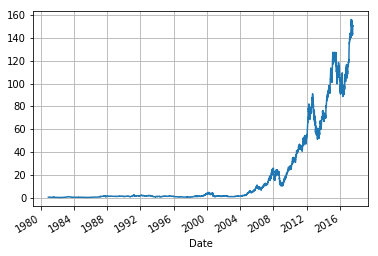

In [16]:
aapl = pd.read_csv("./data/AAPL.csv", index_col=0, parse_dates=[0])
aapl.head()
aapl["Adj Close"].plot(grid=True)

In [17]:
# 等价于
# stocks = pd.DataFrame({"AAPL": aapl["Adj Close"].bfill(),
#                       "MSFT": msft["Adj Close"].bfill(),
#                       "GOOG": goog["Adj Close"].bfill()})stocks = pd.concat([aapl["Adj Close"], goog["Adj Close"]], axis=1)
stocks.columns = ["AAPL", "GOOG"]
stocks.head()
stocks.shape

,AAPL,GOOG
Date,,
1980-12-12,0.423252,NaN
1980-12-15,0.401170,NaN
1980-12-16,0.371726,NaN
1980-12-17,0.380927,NaN
1980-12-18,0.391969,NaN


(9231, 2)

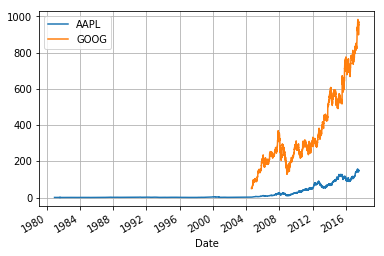

In [18]:
stocks.plot(grid=True)

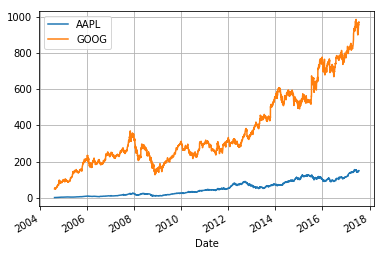

In [23]:
valid_stocks = stocks[stocks.index >= stocks["GOOG"].first_valid_index()]
valid_stocks.plot(grid=True)

In [24]:
valid_stocks.dtypes

AAPL    float64
GOOG    float64
dtype: object

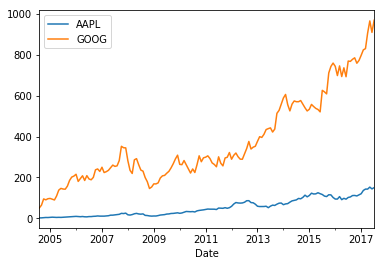

In [26]:
monthly_stocks = valid_stocks.resample("M").last()
monthly_stocks.plot()

In [27]:
i = pd.date_range('2018-04-09', periods=4, freq='2D')
ts = pd.DataFrame({'A': [1,2,3,4]}, index=i)
ts

,A
2018-04-09,1
2018-04-11,2
2018-04-13,3
2018-04-15,4


In [30]:
ts.last('3D')

,A
2018-04-13,3
2018-04-15,4
